In [262]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [263]:
# Load the data.
df2 = pd.read_csv('new_reviews.csv')

# View the DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [387]:
#  Drop unnecessary columns.
df2.drop(['gender', 'age','loyalty_points','education','review','summary'], axis=1, inplace=True)

# View DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   product         2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


,remuneration,spending_score,product
0,12.30,39,453
1,12.30,81,466
2,13.12,6,254
3,13.12,77,263
4,13.94,40,291


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

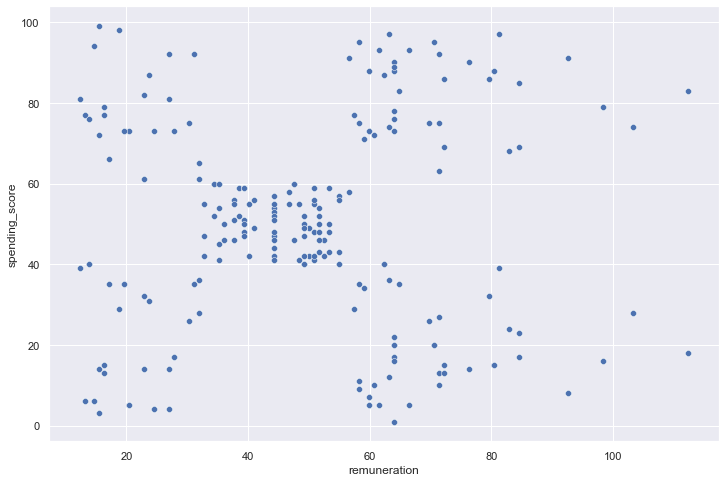

In [265]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,)

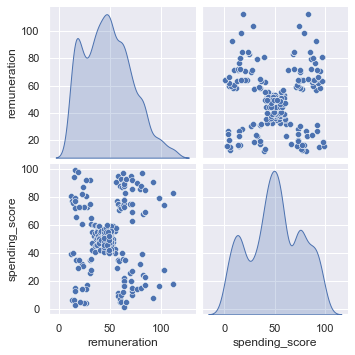

In [266]:
 # Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             diag_kind='kde')

# 3. Elbow and silhoutte methods

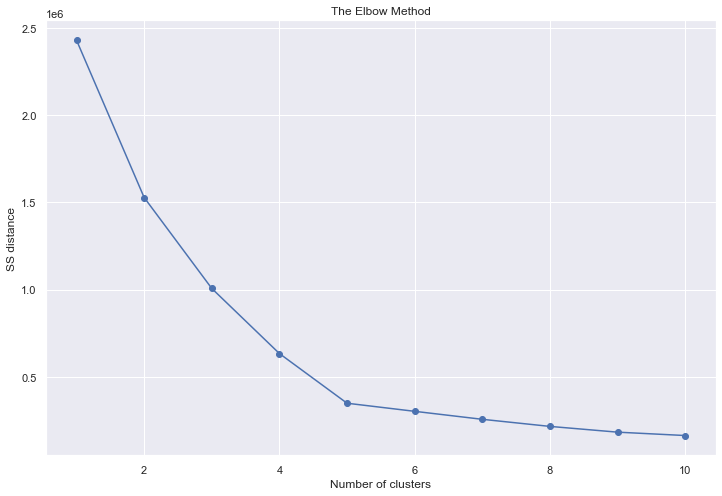

In [267]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

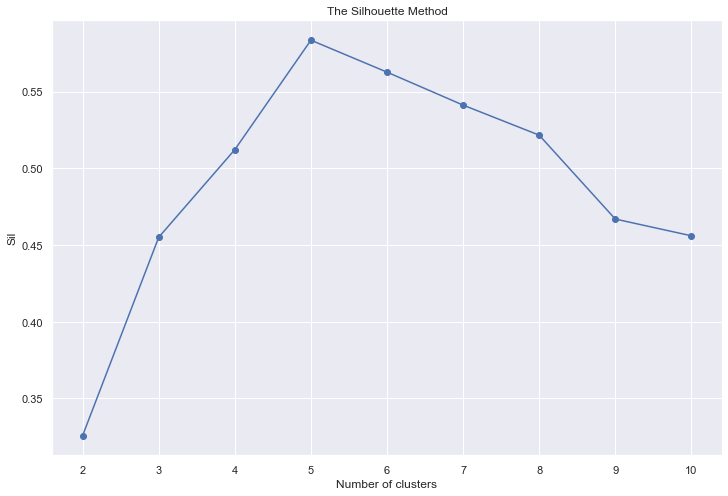

In [268]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# Evaluate k-means model at different values of k

Since both the methods are identifying clusters of 4 or 5, we would first explore k mean of 4 and then 5 to understand which one works better for us. 

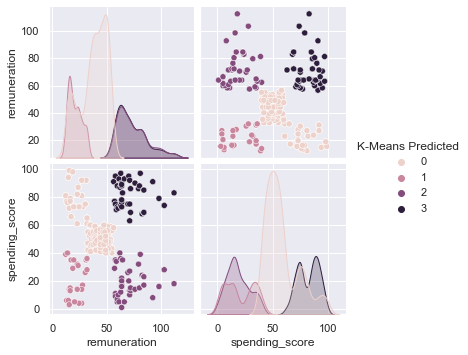

In [269]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [270]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [271]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


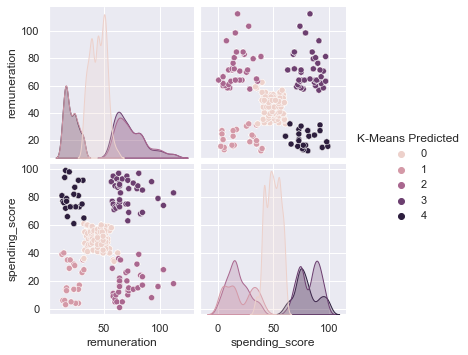

In [272]:
# use of five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [273]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [274]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

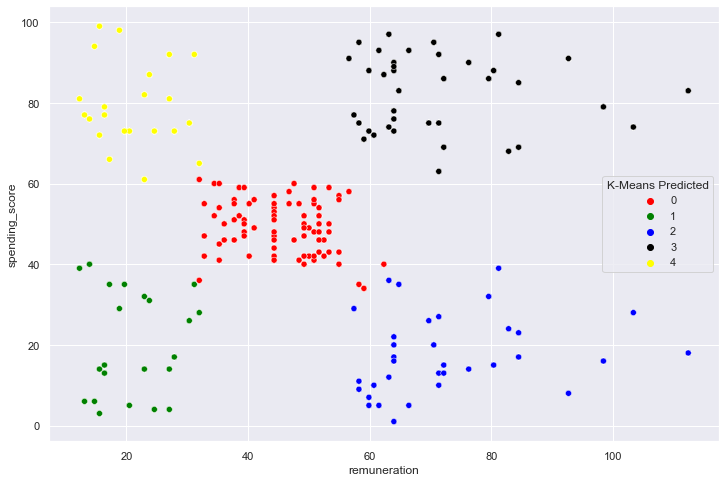

In [275]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','yellow'])

# Summary and justification.

I started by importing the necessary libraries and the dataset created in assignment activity 1. After viewing the data, i removed unnecessary columns and only left the remuneration and spending score column. Since in this activity I had to understand the relationship between these two variables. 
After removing the columns, i viewed the data frame and vvisualised it as a form of scatterplot. This clearly showed 5 hard cluster formations. 
I used the elbow and Silhoute methods to identify teh K values for clustering. Both the methods showed the best k values at 4 or 5. 
Since both the methods identified clusters of 4 and 5, I first ran a model with K value at 4 and tehn at 5 to understand which model would be better for our analysis. 
While visualising with 4 clusters, i observed an overap between teh clusters and in this case 2 completely different ckusters were considered as 1. This led to using 5 clusters instead of 4. 
Clustering the data into 5 groups gave us a set of more homogenous classes and distinct clusters. 


# Week 3 assignment: NLP using Python

In [276]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
!pip install wordcloud
# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [277]:
# Load the data.
df3 = pd.read_csv('new_reviews.csv')

# View the DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [278]:
# Explore data set.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [279]:
#  Drop unnecessary columns.
df3.drop(['gender', 'age','loyalty_points','education','remuneration','spending_score','product'], axis=1, inplace=True)

# View DataFrame.
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [280]:
# Determine if there are any missing values.
missing_values = df3.isna()

In [281]:
# count the number of missing values in each column
missing_values_col = df3.isna().sum()

# count the number of missing values in each row
missing_values_row = df3.isna().sum(axis=1)

# print the resulting counts
print('Number of missing values in each column:')
print(missing_values_col)
print('Total number of missing values in the dataframe:', missing_values_col.sum())

print('Number of missing values in each row:')
print(missing_values_row)

Number of missing values in each column:
review     0
summary    0
dtype: int64
Total number of missing values in the dataframe: 0
Number of missing values in each row:
0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Length: 2000, dtype: int64


There are no missing values in the data frame

In [282]:
# Review: Change all to lower case and join with a space.

df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [283]:
# Remove punctuation.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [284]:
# Remove punctuation.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [285]:
# Drop duplicates.
review_summary = df3.drop_duplicates(subset=['summary'])

# Preview data.
review_summary.reset_index(inplace=True)
review_summary.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [286]:
# Check duplicates in review column.

review_summary.review.duplicated().sum()

# Drop duplicates.
review_summary = review_summary.drop_duplicates(subset=['review'])

# Preview data.
review_summary.reset_index(inplace=True)
review_summary.head()

,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [287]:
review_summary.info()
review_summary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  1350 non-null   int64 
 1   index    1350 non-null   int64 
 2   review   1350 non-null   object
 3   summary  1350 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.3+ KB


,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


# Tokenisation

In [288]:
# Create new DataFrame (copy DataFrame).
token = review_summary

# View DataFrame.
token.info()
token.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  1350 non-null   int64 
 1   index    1350 non-null   int64 
 2   review   1350 non-null   object
 3   summary  1350 non-null   object
dtypes: int64(2), object(2)
memory usage: 42.3+ KB


,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [ ]:
# You might need to install WordCloud.
!pip install WordCloud

In [ ]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [290]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mansiagrawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [291]:
# Tokenise the words.
token['tokens.r'] = token['review'].apply(word_tokenize)

# Preview data.
token['tokens.r'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens.r, dtype: object

In [292]:
# tokenise the words in summary column

token['tokens.s'] = token['summary'].apply(word_tokenize)

# Preview data.
token['tokens.s'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens.s, dtype: object

In [293]:
token.head()
token.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   level_0   1350 non-null   int64 
 1   index     1350 non-null   int64 
 2   review    1350 non-null   object
 3   summary   1350 non-null   object
 4   tokens.r  1350 non-null   object
 5   tokens.s  1350 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.4+ KB


In [294]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [295]:
# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(token.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + token['review'][i]

In [296]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

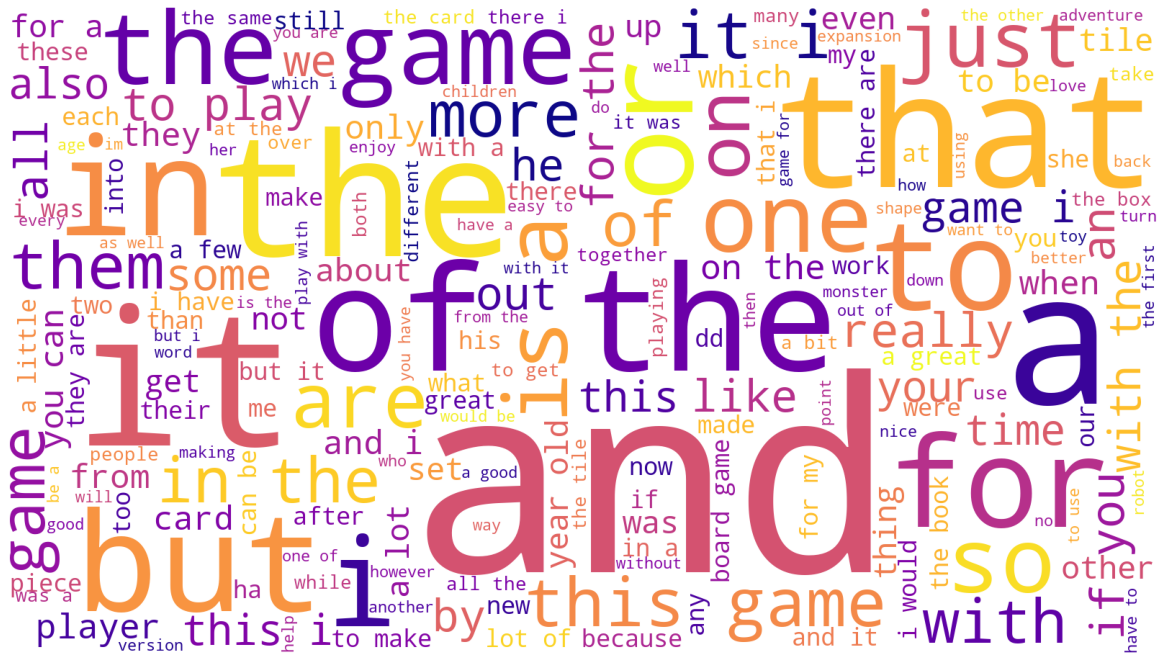

In [297]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [298]:
# String all the summary together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(token.shape[0]):
    # Add each comment.
    all_summary = all_summary + token['summary'][i]

In [299]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

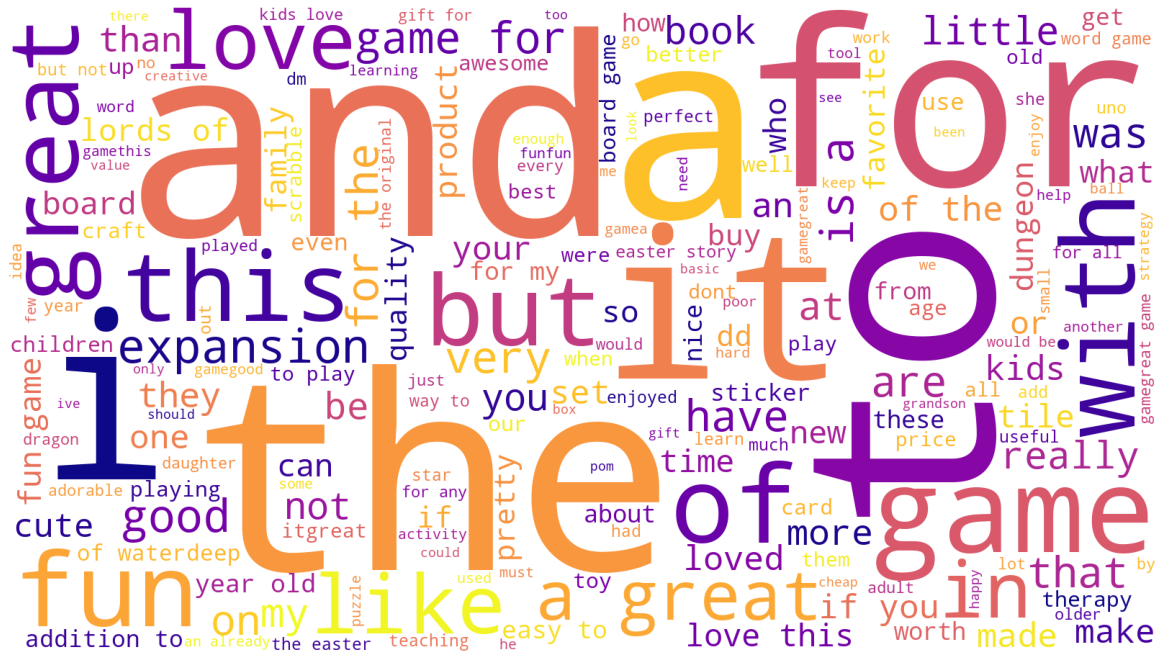

In [300]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


# Frequency distribution and polarity

In [301]:
token['tokens.r'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens.r, dtype: object

In [302]:
#frequency distribution in reviews
# Define an empty list of tokens.
token_r2 = []

for i in range(token.shape[0]):
    # Add each token to the list.
    token_r2 = token_r2 + token['tokens.r'][i]

In [303]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_r = FreqDist(token_r2)

# Preview data.
fdist_r

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [304]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_r3 = [word for word in token_r2 if word.isalnum()]


In [407]:
tokens_s = token['tokens.s']
tokens_s.head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens.s, dtype: object

In [305]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_r4 = [x for x in tokens_r3 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_r5_string = ''

for value in tokens_r3:
    # Add each filtered token word to the string.
    tokens_r5_string = tokens_r5_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mansiagrawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


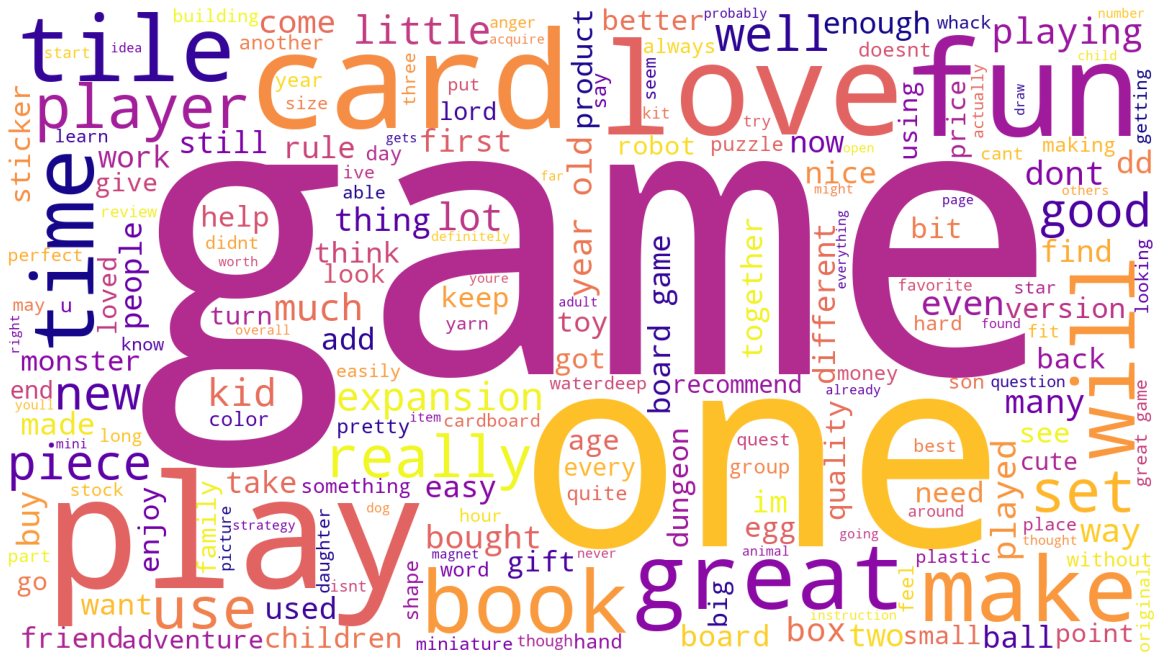

In [306]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_r5_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Frequency distribution and polarity for summary

In [375]:
token['tokens.s'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens.s, dtype: object

In [307]:
#frequency distribution in reviews
# Define an empty list of tokens.
token_s2 = []

for i in range(token.shape[0]):
    # Add each token to the list.
    token_s2 = token_s2 + token['tokens.s'][i]

In [308]:
# Calculate the frequency distribution.
fdist_s = FreqDist(token_s2)

# Preview data.
fdist_s

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

In [309]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_s3 = [word for word in token_s2 if word.isalnum()]

In [310]:
# Create a filtered list of tokens without stopwords.
tokens_s4 = [x for x in tokens_s3 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_s5_string = ''

for value in tokens_s3:
    # Add each filtered token word to the string.
    tokens_s5_string = tokens_s5_string + value + ' '

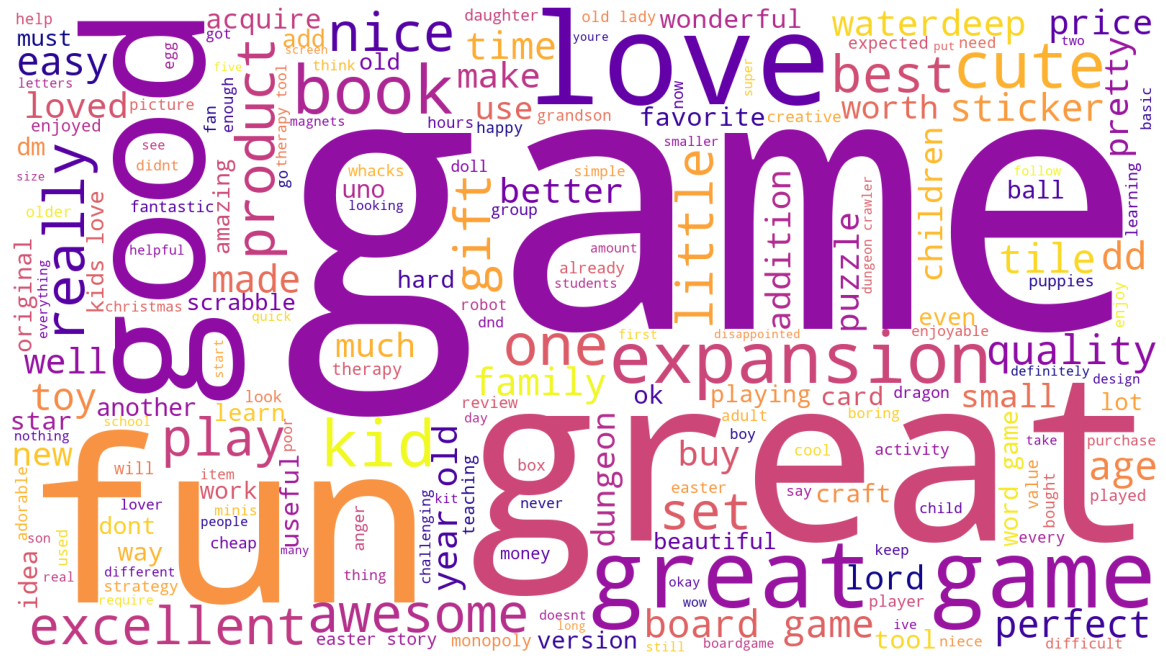

In [311]:
# Create a WordCloud.
wordcloud_s = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_s5_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_s) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


# Determine the 15 most common words.

Frequency count for Review

In [312]:
# View the frequency distribution.
fdistr1 = FreqDist(tokens_r4)

# Preview the data.
fdistr1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [313]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_r = pd.DataFrame(Counter(tokens_r4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_r

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


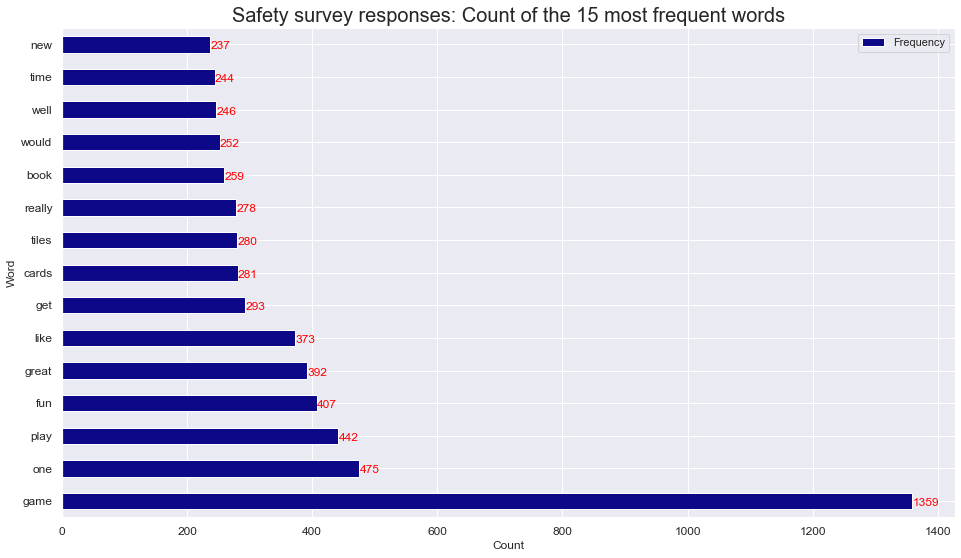

In [314]:
# Set the plot type.
ax = counts_r.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

Frequency count for Summary 

In [315]:
# View the frequency distribution.
fdists1 = FreqDist(tokens_s4)

# Preview the data.
fdists1

FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [316]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_s = pd.DataFrame(Counter(tokens_s4).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_s

,Frequency
Word,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


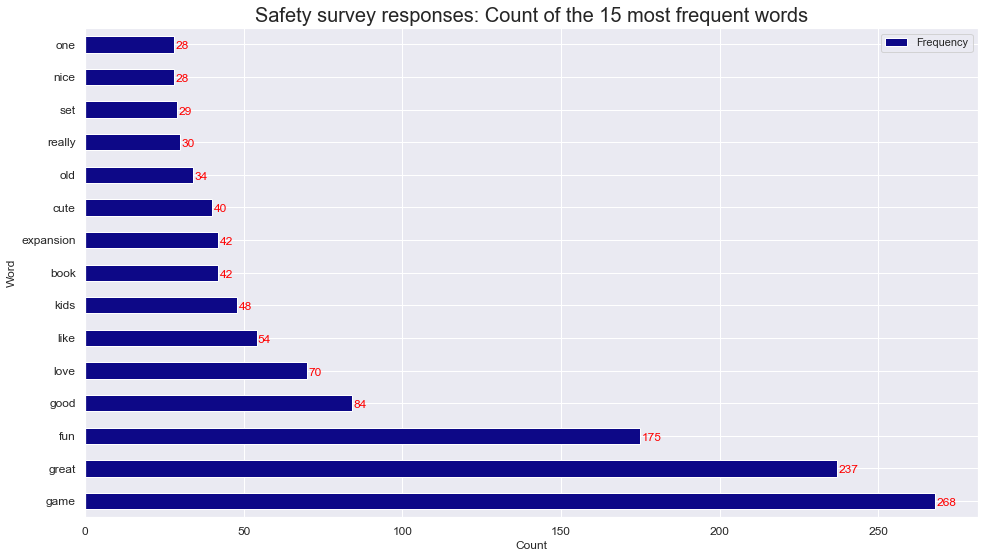

In [317]:
# Set the plot type.
ax = counts_s.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Extract Polarity 

In [318]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mansiagrawal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [319]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [388]:


df_polarity_r = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in tokens_r}

In [321]:

# We can see some of the highly positive words. 
polarity_r = pd.DataFrame(df_polarity_r).T

# View the DataFrame.
polarity_r.head(20)

,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,0.128,0.639,0.233,0.7958
could be better but its still great i love the things on the dms side of the screen and i actually like the map in the middle makes it easy to reference whats around at any given time,0.000,0.602,0.398,0.9702
my review will mirror others in that this kind of misses the mark and there are some lost opportunities to help dms i wouldnt advise new dms to use this by itself they should stick to the generic 5e dm screen and just copyprint the other useful information for skt i do like that the information they did put in the screen was relevant to the game and makes accessible some of the frequently visited tables from the adventure book i also like the map from the perspective that it contains the page references to the cities and locations this is pretty useful especially during ch 3 of the adventure however there is a very large amount of wasted space that could easily have been utilized instead of having the whole map

In [322]:
# Get the top 20 positive reviews 
polarity_r.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
entertaining,0.0,0.000,1.000,0.4404
perfect,0.0,0.000,1.000,0.5719
great,0.0,0.000,1.000,0.6249
cute,0.0,0.000,1.000,0.4588
fun gift,0.0,0.000,1.000,0.7351
fun good service,0.0,0.139,0.861,0.7351
very cute,0.0,0.233,0.767,0.5095
its fun,0.0,0.233,0.767,0.5106
liked it,0.0,0.263,0.737,0.4215
a fun game we enjoy it a great deal,0.0,0.274,0.726,0.8910


In [323]:
polarity_r.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520
not as easy as it looks,0.325,0.675,0.000,-0.3412
we really did not enjoy this game,0.325,0.675,0.000,-0.4389
hard to put together,0.318,0.682,0.000,-0.1027
my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,0.318,0.613,0.069,-0.8674
easytouse great for anger management groups,0.314,0.339,0.347,0.1027
its ok but loses its luster quickly,0.309,0.524,0.168,-0.3291


Polarity for Summary

In [408]:

df_polarity_s = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in tokens_s}

In [409]:

# We can see some of the highly positive words. 
polarity_s = pd.DataFrame(df_polarity_s).T

# View the DataFrame.
polarity_s.head(20)

,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
best gm screen ever,0.000,0.417,0.583,0.6369
great but could be even better,0.000,0.385,0.615,0.7506
another missed opportunity not a value add to the product line,0.302,0.499,0.199,-0.1119
love the map,0.000,0.323,0.677,0.6369
not a general dm screen,0.000,1.000,0.000,0.0000


In [410]:
# Get the top 20 positive reviews 
polarity_s.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
awesome,0.0,0.0,1.0,0.6249
great gift,0.0,0.0,1.0,0.7906
precious,0.0,0.0,1.0,0.5719
pretty cool,0.0,0.0,1.0,0.6705
wow,0.0,0.0,1.0,0.5859
ok ok,0.0,0.0,1.0,0.5267
beautiful,0.0,0.0,1.0,0.5994
perfect,0.0,0.0,1.0,0.5719
great,0.0,0.0,1.0,0.6249
ok,0.0,0.0,1.0,0.2960


In [411]:
polarity_s.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointing,1.000,0.000,0.0,-0.4939
meh,1.000,0.000,0.0,-0.0772
boring,1.000,0.000,0.0,-0.3182
disappointed,1.000,0.000,0.0,-0.4767
frustrating,1.000,0.000,0.0,-0.4404
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


Visualising Polarity !

For reviews

In [412]:
# Provided function.
def generate_polarity( tokens_r):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(tokens_r).sentiment[0]

In [413]:
polarity_r['compound'].describe()

count    1350.000000
mean        0.660546
std         0.424616
min        -0.991300
25%         0.599400
50%         0.834450
75%         0.930050
max         0.999600
Name: compound, dtype: float64

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.90345782e+00,
         1.45633506e+00, 1.50655351e-01, 1.11596556e-02, 1.11596556e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78991390e-02,
         5.57982781e-03, 7.25377615e-02, 2.56672079e-01, 7.64436409e-01,
         2.46070406e+00, 3.21398082e+00, 7.30957443e-01],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.52402953e-01,
         3.00194736e+00, 2.49976286e+00, 9.54150555e-01, 3.23630013e-01,
         1.50655351e-01, 2.23193112e-02, 2.78991390e-02],
        [7.81175893e-02, 6.13781059e-02, 8.36974171e-02, 1.06016728e-01,
         9.48570727e-02, 1.00436901e-01, 8.92772449e-02, 2.51092251e-01,
         1.28336040e-01

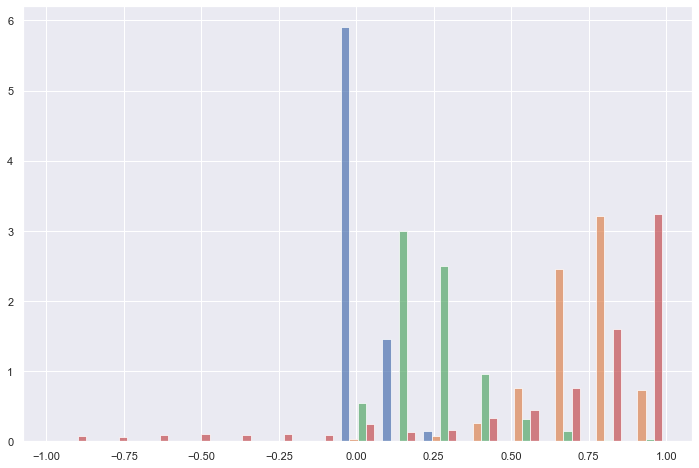

In [414]:

# create a histogram
plt.hist(polarity_r, bins=15, density=True, alpha=0.7)

For Summary

In [415]:
# Provided function.
def generate_polarity( tokens_s):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(tokens_r).sentiment[0]

In [417]:
polarity_s['compound'].describe()

count    1348.000000
mean        0.385808
std         0.347744
min        -0.905200
25%         0.000000
50%         0.510600
75%         0.624900
max         0.952400
Name: compound, dtype: float64

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.87443891e+00,
         2.86191594e-01, 3.67960621e-01, 1.63538054e-01, 8.17690270e-02,
         4.67251583e-02, 2.33625791e-02, 2.92032239e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.56988370e-01,
         6.07427057e-01, 1.21485411e+00, 1.35502959e+00, 1.50104571e+00,
         1.01627219e+00, 5.19817386e-01, 1.40175475e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.90989084e+00,
         4.26367069e-01, 1.03963477e+00, 1.27326056e+00, 1.25573863e+00,
         1.06883800e+00, 6.54152216e-01, 2.45307081e-01],
        [5.84064478e-03, 2.33625791e-02, 6.42470926e-02, 1.69378699e-01,
         1.98581923e-01, 9.34503165e-02, 1.16812896e-01, 1.52440829e+00,
         1.75219343e-01

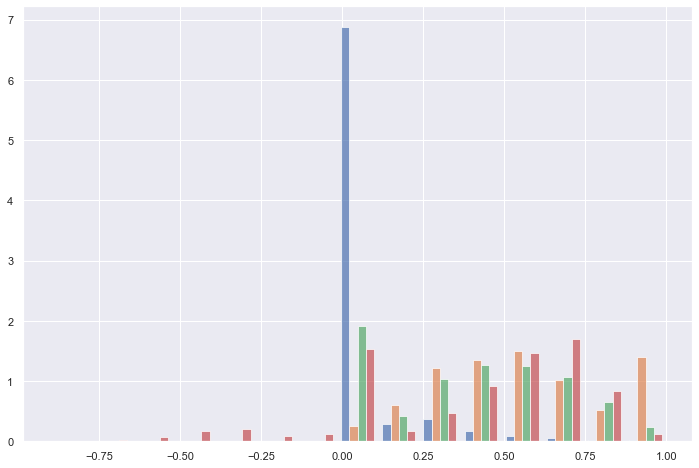

In [418]:
# create a histogram
plt.hist(polarity_s, bins=15, density=True, alpha=0.7)